# Predicting No - Shows at Clinics using Logistic Regression

# Step 1: Load the data from the csv file using pandas

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('Clinic-no-show-data.csv')

# Step 2: preview / print the top 10 rows of the data

In [5]:
data.head(10)

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Status
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29,Show-Up
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1,Show-Up
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1,Show-Up
3,5,M,Thursday,0,0,0,0,0,0,0,1,15,Show-Up
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6,Show-Up
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35,No-Show
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18,Show-Up
7,4,F,Friday,0,0,0,0,0,1,0,1,14,Show-Up
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14,Show-Up
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4,Show-Up


# Step 3:Label Distribution

In [6]:
from collections import Counter

In [7]:
Counter(data['Status'])

Counter({'No-Show': 90731, 'Show-Up': 209269})

# Step 4: Create the features matrix

In [8]:
Features = data.drop('Status', 1)

In [9]:
Features

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1
3,5,M,Thursday,0,0,0,0,0,0,0,1,15
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18
7,4,F,Friday,0,0,0,0,0,1,0,1,14
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4


# Step 5: creates the labels vector

In [10]:
Labels = data['Status']

# Step 6: convert the categorical features to multiple binary features

In [11]:
Features = pd.get_dummies(Features)

In [12]:
Features.head(10)

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Gender_F,Gender_M,DayOfTheWeek_Friday,DayOfTheWeek_Monday,DayOfTheWeek_Saturday,DayOfTheWeek_Sunday,DayOfTheWeek_Thursday,DayOfTheWeek_Tuesday,DayOfTheWeek_Wednesday
0,19,0,0,0,0,0,0,0,0,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0,0,0,0,0,0,0,1,15,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38,0,0,0,0,0,0,0,1,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5,0,0,0,0,0,0,0,1,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,46,0,0,0,0,0,0,0,1,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4,0,0,0,0,0,1,0,1,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20,0,0,0,0,0,0,0,0,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,51,1,0,1,0,0,0,0,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 7: Split the data into training and testingfrom sklearn import cross_validation as cv

In [13]:
from sklearn import cross_validation as cv
Features_train, Features_test, Labels_train, Labels_test = cv.train_test_split(Features, Labels, test_size=0.2)

# Step 8: Train a Logistic Regression Model

In [14]:
from sklearn import linear_model as lm
LR = lm.LogisticRegression()
LR.fit(Features_train, Labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Step 9: Apply the Trained Model to the Test data

In [15]:
Test_Predictions = LR.predict(Features_test)

In [16]:
Test_Predictions

array(['Show-Up', 'Show-Up', 'Show-Up', ..., 'Show-Up', 'Show-Up',
       'Show-Up'], dtype=object)

In [17]:
Test_Prediction_Probabilities = LR.predict_proba(Features_test)
import numpy
numpy.round(Test_Prediction_Probabilities, 3)

array([[ 0.392,  0.608],
       [ 0.234,  0.766],
       [ 0.315,  0.685],
       ..., 
       [ 0.298,  0.702],
       [ 0.326,  0.674],
       [ 0.33 ,  0.67 ]])

# Apply the Trained Model to individual Instances

In [18]:
LR.predict(Features_train.iloc[[2]])

array(['Show-Up'], dtype=object)

In [19]:
LR.predict_proba(Features_train.iloc[[2]])

array([[ 0.33621928,  0.66378072]])

In [20]:
LR.predict(Features_train.iloc[[5]])

array(['Show-Up'], dtype=object)

In [21]:
LR.predict_proba(Features_train.iloc[[5]])

array([[ 0.32253147,  0.67746853]])

# Step 10: print the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [23]:
confusion_matrix(Labels_test, Test_Predictions)

array([[  115, 18138],
       [  118, 41629]])

# Step 11: compute and print the values

In [24]:
accuracy_score(Labels_test, Test_Predictions)

0.69573333333333331

In [25]:
from sklearn import preprocessing

In [26]:
LE = preprocessing.LabelEncoder()

In [33]:
LE.fit(["No-Show", "Show-Up"])

LabelEncoder()

In [34]:
LE.transform(Labels_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
 precision_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive Precision

0.69652149179312994

In [36]:
recall_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive Recall

0.99717344958919207

In [37]:
f1_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive F-Score

0.82016273617432067

# PR & ROC Curves and AUC

In [38]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [39]:
precision, recall, thresholds = precision_recall_curve(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

In [40]:
precision

array([ 0.69581812,  0.69581305,  0.69580798, ...,  0.33333333,
        0.        ,  1.        ])

In [41]:
recall

array([  1.00000000e+00,   9.99976046e-01,   9.99952092e-01, ...,
         2.39538170e-05,   0.00000000e+00,   0.00000000e+00])

In [42]:
thresholds

array([ 0.10187567,  0.1059047 ,  0.10982391, ...,  0.83500387,
        0.83595242,  0.84177601])

# Step 12: plot the PR and ROC curves

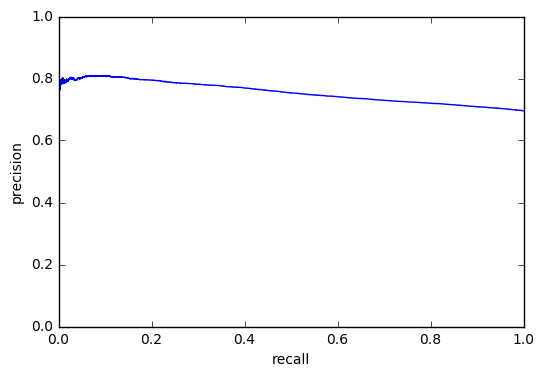

In [43]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [44]:
from sklearn.metrics import auc, roc_auc_score

In [45]:
auc(recall, precision)

0.75523730614148565

In [46]:
tpr, fpr, thr = roc_curve(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

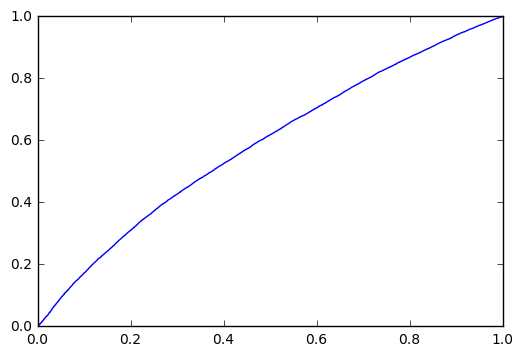

In [47]:
plt.figure()
plt.plot(tpr, fpr)
plt.show()

In [48]:
roc_auc_score(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

0.58700333038895913

In [49]:
auc(tpr, fpr)

0.58700333038895913

In [50]:
auc(recall,precision)

0.75523730614148565

# Step 13: remove the "SMS_ REMiNDER" feature

In [52]:
Features = data.drop('Sms_Reminder', 1)

In [53]:
Features

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,AwaitingTime,Status
0,19,M,Wednesday,0,0,0,0,0,0,0,29,Show-Up
1,24,F,Wednesday,0,0,0,0,0,0,0,1,Show-Up
2,4,F,Tuesday,0,0,0,0,0,0,0,1,Show-Up
3,5,M,Thursday,0,0,0,0,0,0,0,15,Show-Up
4,38,M,Tuesday,0,0,0,0,0,0,0,6,Show-Up
5,5,F,Tuesday,0,0,0,0,0,0,0,35,No-Show
6,46,F,Tuesday,0,0,0,0,0,0,0,18,Show-Up
7,4,F,Friday,0,0,0,0,0,1,0,14,Show-Up
8,20,F,Tuesday,0,0,0,0,0,0,0,14,Show-Up
9,51,F,Tuesday,1,0,1,0,0,0,0,4,Show-Up


In [54]:
from sklearn import linear_model as lm
LR = lm.LogisticRegression()
LR.fit(Features_train, Labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
Test_Predictions = LR.predict(Features_test)

In [56]:
Test_Predictions

array(['Show-Up', 'Show-Up', 'Show-Up', ..., 'Show-Up', 'Show-Up',
       'Show-Up'], dtype=object)

In [57]:
Test_Prediction_Probabilities = LR.predict_proba(Features_test)
import numpy
numpy.round(Test_Prediction_Probabilities, 3)

array([[ 0.392,  0.608],
       [ 0.234,  0.766],
       [ 0.315,  0.685],
       ..., 
       [ 0.298,  0.702],
       [ 0.326,  0.674],
       [ 0.33 ,  0.67 ]])

In [58]:
LR.predict(Features_train.iloc[[2]])

array(['Show-Up'], dtype=object)

In [59]:
LR.predict_proba(Features_train.iloc[[2]])

array([[ 0.33621928,  0.66378072]])

In [60]:
LR.predict(Features_train.iloc[[5]])

array(['Show-Up'], dtype=object)

In [61]:
LR.predict_proba(Features_train.iloc[[5]])

array([[ 0.32253147,  0.67746853]])

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc

In [63]:
confusion_matrix(Labels_test, Test_Predictions)

array([[  115, 18138],
       [  118, 41629]])

In [64]:
accuracy_score(Labels_test, Test_Predictions)

0.69573333333333331

In [65]:
from sklearn import preprocessing

In [66]:
LE = preprocessing.LabelEncoder()

In [67]:
LE.fit(["No-Show", "Show-Up"])

LabelEncoder()

In [68]:
LE.transform(Labels_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
precision_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive Precision

0.69652149179312994

In [70]:
recall_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive Recall

0.99717344958919207

In [71]:
f1_score(LE.transform(Labels_test), LE.transform(Test_Predictions)) #Positive F-Score

0.82016273617432067

In [72]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [73]:
precision, recall, thresholds = precision_recall_curve(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

In [74]:
precision

array([ 0.69581812,  0.69581305,  0.69580798, ...,  0.33333333,
        0.        ,  1.        ])

In [75]:
recall

array([  1.00000000e+00,   9.99976046e-01,   9.99952092e-01, ...,
         2.39538170e-05,   0.00000000e+00,   0.00000000e+00])

In [76]:
thresholds

array([ 0.10187567,  0.1059047 ,  0.10982391, ...,  0.83500387,
        0.83595242,  0.84177601])

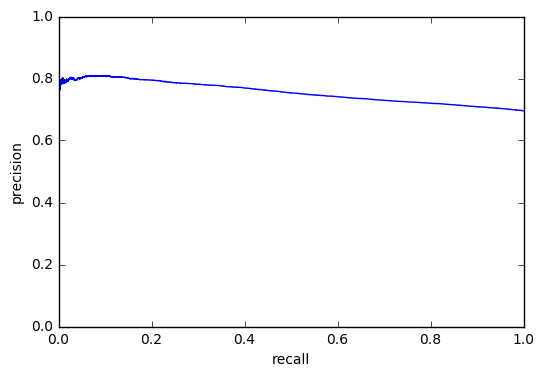

In [77]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [78]:
from sklearn.metrics import auc, roc_auc_score

In [79]:
auc(recall, precision)

0.75523730614148565

In [80]:
tpr, fpr, thr = roc_curve(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

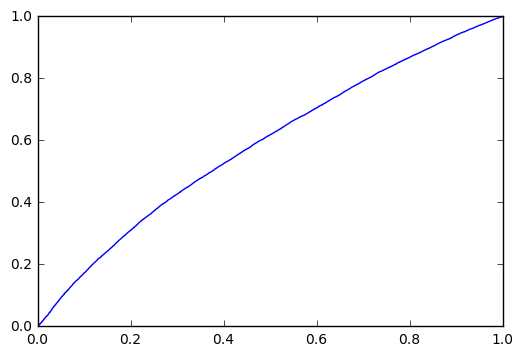

In [81]:
plt.figure()
plt.plot(tpr, fpr)
plt.show()

In [82]:
roc_auc_score(LE.transform(Labels_test), Test_Prediction_Probabilities[:, 1])

0.58700333038895913

In [83]:
auc(tpr, fpr)

0.58700333038895913

In [84]:
auc(recall,precision)

0.75523730614148565

# Step 14: re- train the model on all the features using 10-fold cross validation

In [87]:
import pandas as pd

In [88]:
data = pd.read_csv('Clinic-no-show-data.csv')

In [89]:
data.head(10)

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Status
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29,Show-Up
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1,Show-Up
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1,Show-Up
3,5,M,Thursday,0,0,0,0,0,0,0,1,15,Show-Up
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6,Show-Up
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35,No-Show
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18,Show-Up
7,4,F,Friday,0,0,0,0,0,1,0,1,14,Show-Up
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14,Show-Up
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4,Show-Up


In [90]:
from collections import Counter

In [91]:
Counter(data['Status'])

Counter({'No-Show': 90731, 'Show-Up': 209269})

In [93]:
Features = data.drop('Status', 1)

In [94]:
Features 

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,Wednesday,0,0,0,0,0,0,0,0,29
1,24,F,Wednesday,0,0,0,0,0,0,0,0,1
2,4,F,Tuesday,0,0,0,0,0,0,0,0,1
3,5,M,Thursday,0,0,0,0,0,0,0,1,15
4,38,M,Tuesday,0,0,0,0,0,0,0,1,6
5,5,F,Tuesday,0,0,0,0,0,0,0,1,35
6,46,F,Tuesday,0,0,0,0,0,0,0,1,18
7,4,F,Friday,0,0,0,0,0,1,0,1,14
8,20,F,Tuesday,0,0,0,0,0,0,0,0,14
9,51,F,Tuesday,1,0,1,0,0,0,0,1,4


In [95]:
Features = pd.get_dummies(Features)

In [96]:
Features.head(10)

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Gender_F,Gender_M,DayOfTheWeek_Friday,DayOfTheWeek_Monday,DayOfTheWeek_Saturday,DayOfTheWeek_Sunday,DayOfTheWeek_Thursday,DayOfTheWeek_Tuesday,DayOfTheWeek_Wednesday
0,19,0,0,0,0,0,0,0,0,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0,0,0,0,0,0,0,1,15,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38,0,0,0,0,0,0,0,1,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5,0,0,0,0,0,0,0,1,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,46,0,0,0,0,0,0,0,1,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4,0,0,0,0,0,1,0,1,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20,0,0,0,0,0,0,0,0,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,51,1,0,1,0,0,0,0,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
from sklearn import cross_validation as cv

#Let's set K to 10 by using the argument cv=10.
scores = cv.cross_val_score(LR, Features, LE.transform(Labels), cv=10)  # Accuracies of the 10 folds

In [122]:
scores

array([ 0.69664345,  0.69813333,  0.697     ,  0.69753333,  0.6978    ,
        0.69773333,  0.6966    ,  0.69726667,  0.69726667,  0.69735658])

In [123]:
scores.mean()

0.69733333571044454

In [124]:
from sklearn.metrics import make_scorer

In [116]:
cv.cross_val_score(LR, Features, LE.transform(Labels), cv=10, scoring=make_scorer(precision_score)).mean()


0.69814650830847969

In [117]:
cv.cross_val_score(LR, Features, LE.transform(Labels), cv=10, scoring=make_scorer(recall_score)).mean()


0.99730967962383088

In [125]:
cv.cross_val_score(LR, Features, LE.transform(Labels), cv=10, scoring=make_scorer(f1_score)).mean()

0.82133439090897031

In [126]:
cv.cross_val_predict(LR, Features,  LE.transform(Labels), cv=10)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)